In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

## Pandas Datetime

In [5]:
df = pd.read_csv("data/apple_stock.csv")

In [6]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
Date         2265 non-null object
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: float64(6), object(1)
memory usage: 124.0+ KB


Object 타입인 Date 칼럼을 DateTime 타입으로 바꿔줘야 함

In [8]:
df['Date'] = df['Date'].apply(pd.to_datetime)
# df.index = pd.to_datetime(df.index)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
Date         2265 non-null datetime64[ns]
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 124.0 KB


Date 칼럼을 index 로 만듦

In [11]:
df.set_index('Date', inplace=True)

In [13]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


## Pandas Datetime - Resampling

#### Resampling Methods : https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

_resample 함수를 사용할 때 장점_  
- 누락된 date 값에 대한 에러 보장
- 불편한 중복 groupby 함수 방지
- 쉽게 보이는 코드

In [14]:
# 매 년별 평균
df.resample(rule='A').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719
2010-12-31,37.481258,36.692517,37.136803,37.120351,1.498263e+08,24.858119
2011-12-31,52.489082,51.471100,52.008775,52.000618,1.230747e+08,34.822880
2012-12-31,83.117914,81.417309,82.378960,82.292817,1.319642e+08,56.076387
2013-12-31,68.234132,66.892443,67.589734,67.519269,1.016087e+08,53.083607
2014-12-31,93.012664,91.475538,92.219830,92.264654,6.315273e+07,84.295298
2015-12-31,121.244524,118.863095,120.175754,120.040000,5.183789e+07,112.931425
2016-12-31,105.427183,103.690278,104.507778,104.604008,3.841516e+07,100.449894
2017-12-31,151.406056,149.487650,150.444900,150.551075,2.713317e+07,147.299024


In [28]:
# 매 주별 월요일 기준 평균
df.resample(rule='W-MON').mean().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.560714,30.210000,30.468572,30.338572,105767550.0,20.316611
2010-01-11,30.509143,30.016000,30.395142,30.229143,127051820.0,20.243333
2010-01-18,30.098571,29.478929,29.932143,29.776072,139207075.0,19.939927
2010-01-25,30.178571,29.180000,29.846000,29.590285,194889100.0,19.815514
2010-02-01,29.371143,28.067429,28.890857,28.568571,337950480.0,19.131311


#### Custom Resampling

resample 이후 호출될 함수를 임의로 customizing 가능

In [16]:
def get_first_day(sample):
    return sample[0]

In [17]:
df.resample(rule='A').apply(get_first_day)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964


#### Plotting

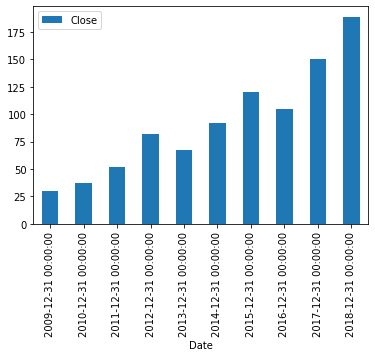

In [23]:
df[['Close']].resample(rule='A').mean().plot(kind='bar')

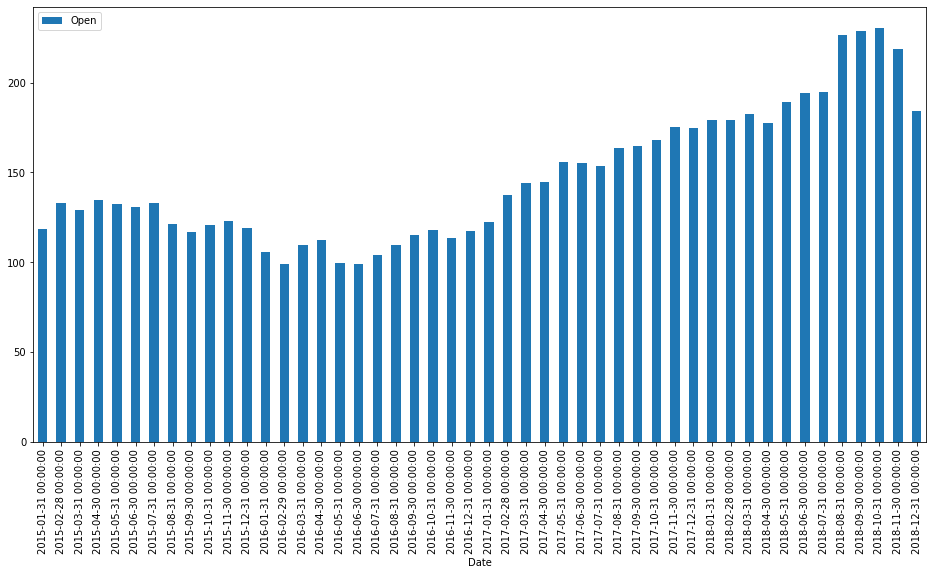

In [25]:
df[['Open']]['2015':].resample(rule='M').max().plot(kind='bar', figsize=(16, 8))

## Pandas Datetime - Shift

시계열 데이터에서 인덱스에 따라 데이터를 일정한 간격으로 이동시켜야 할 경우가 있음.  
이렇게 shift 된 데이터를 lagged 데이터라고 함.  
  
시계열 분석에는 대부분 이러한 lagged 데이터를 필요로 함.
  
pandas 에는 이를 지원하는 함수들이 여럿 있음.

#### Forward Shifting

In [29]:
df.shift(1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680


In [30]:
df.shift(1).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,158.160004,149.630005,156.860001,150.729996,95744600.0,150.729996
2018-12-26,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-27,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-28,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-31,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996


#### Backward Shifting

In [31]:
df.shift(-1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-04,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-05,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-06,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-07,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305


In [32]:
df.shift(-1).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-26,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-27,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
2018-12-28,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN


#### Shifting Based on Offset Alias

In [39]:
# 한 달 앞으로 모든 데이터를 shift
df.tshift(freq='M', periods=12).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-12-31,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-12-31,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-12-31,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [36]:
df.tshift(freq='M', periods=12).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-30,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2019-11-30,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2019-11-30,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2019-11-30,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
2019-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005
